In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [3]:
from datetime import datetime, time
import pandas_datareader.data as pdr
import yfinance as yf

In [4]:
today = datetime.now().date()
five_year_ago = today.replace(year = today.year-5)
ten_year_ago = today.replace(year = today.year-10)
twenty_year_ago = today.replace(year= today.year-20)
stock_symbol = "AAPL"
try:
    data =yf.download(stock_symbol, start=ten_year_ago, end=today, rounding=True,multi_level_index=False)
    print(data.head())
except Exception as e:
    print(f"Error: {e}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

            Close   High    Low   Open     Volume
Date                                             
2015-04-21  28.34  28.63  28.29  28.61  129740400
2015-04-22  28.72  28.78  28.21  28.36  150618000
2015-04-23  28.96  29.13  28.62  28.65  183083600
2015-04-24  29.10  29.17  28.86  29.14  178103600
2015-04-27  29.62  29.73  29.29  29.55  387816800


Exponential moving avergae

In [19]:
#using ewm methidmethod

ema = data['Close'].ewm(com=0.4,min_periods=20).mean()


In [20]:
#Simple moving average
sma = data['Close'].rolling(20).mean()

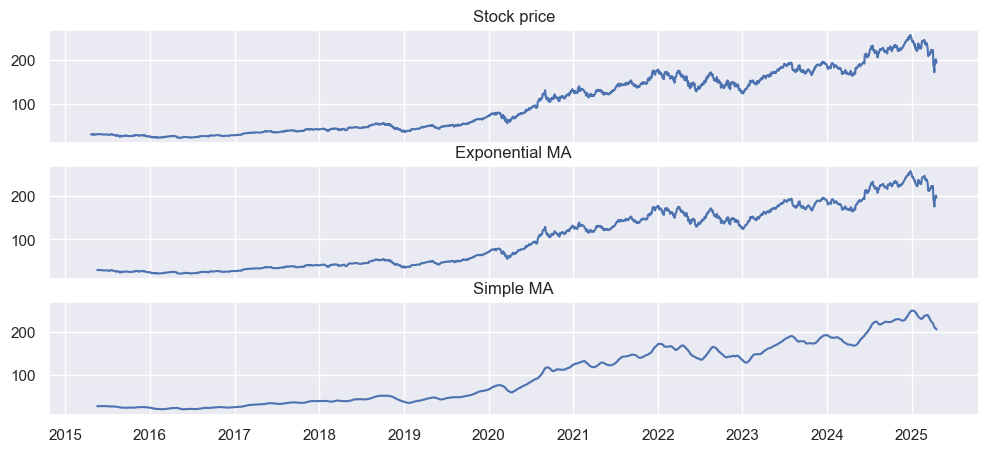

In [25]:


#Plotting the value
fig, axs = plt.subplots(3, figsize=(12,5),sharex=True, sharey=True)
axs[0].plot(data['Close'])
axs[0].set_title("Stock price")
axs[1].plot(ema)
axs[1].set_title("Exponential MA")
axs[2].plot(sma)
axs[2].set_title("Simple MA")
plt.show()


